# Lista 8 (10 pkt.)

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import random

## Zadanie 1 (2 pkt.)

Napisz funkcję **gen(a,b,p)**, która generuje listę punktów reprezentujących krzywą eliptyczną nad $\mathbb{Z}_p$ o równaniu $y^2=(x^3+ax+b)\mod p$.

In [2]:
def gen(a, b, p):
    points = []

    squares = {}
    for y in range(p):
        y_sq = (y * y) % p
        if y_sq not in squares:
            if y == 0:
                squares[y_sq] = [0]
            else:
                squares[y_sq] = [y, p - y]

    for x in range(p):
        v = (x * x * x + a * x + b) % p

        if v in squares:

            for y in squares[v]:
                if [x, y] not in points:
                    points.append([x, y])

    points.sort(key=lambda P: (P[0], P[1]))

    return points

In [3]:
print(gen(-1,0,7)==[[0, 0], [1, 0], [4, 2], [4, 5], [5, 1], [5, 6], [6, 0]])
print(gen(-1,0,11)==[[0, 0], [1, 0], [4, 4], [4, 7], [6, 1], [6, 10], [8, 3], [8, 8], [9, 4], [9, 7], [10, 0]])
print(gen(-1,1,7)==[[0, 1], [0, 6], [1, 1], [1, 6], [2, 0], [3, 2], [3, 5], [5, 3], [5, 4], [6, 1], [6, 6]])
print(gen(0,2,5)==[[2, 0], [3, 2], [3, 3], [4, 1], [4, 4]])

True
True
True
True


## Zadanie 2 (2 pkt.)

Napisz funkcję **add(P,Q,a,p)**, która dodaje do siebie punkty $P$ i $Q$ na krzywej eliptycznej nad ciałem $\mathbb{Z}_p$ z parametrem $a$. Wykorzystaj wzory z wykładu.

$$x_3 = \left(s^2-x_1-x_2\right) \mod p$$
$$y_3 = \left(s\left(x_1-x_3\right)-y_1 \right) \mod p$$

$$s=\frac{y_2-y_1}{x_2-x_1} \mod p \quad P\neq Q$$
$$s=\frac{3x_1^2+a}{2y_1} \mod p \quad P=Q$$

$(x_3, y_3)$ to współrzędne punktu będącego sumą punktów $(x_1, y_1)$ i $(x_2, y_2)$. Natomiast $a$ to współczynnik z równania krzywej.

Uwaga 1: wszystkie operacje w tych wzorach są na ciele $\mathbb{Z}_p$ zatem tam gdzie mamy dzielenie mamy tak naprawdę mnożenie przez odwrotność w tym ciele, wykorzystaj tutaj funkcję **inv** z poprzedniej listy, może być potrzeba ją nieco zmodyfikować, ponieważ może się tu pojawić dzielenie przez zero, które daje nam punkt "w nieskończości" (na wykładzie: $\mathcal{O}$).

Uwaga 2: Uwzględnij również, że zarówno w wyniku dodawania jak i w argumentach dodawanie może pojawić się punkt "w nieskończoności", zwracaj go jako **nan**, tj. za pomocą **float('nan')**, do sprawdzania czy coś jest **nan** użyj **np.isnan()**.

In [4]:
# Funkcja do obliczania odwrotności modularnej a^(-1) mod m
def inv(p, n):
    t0, t1 = 0, 1
    r0, r1 = n, p
    while r1 != 0:
        q = r0 // r1
        t0, t1 = t1, t0 - q * t1
        r0, r1 = r1, r0 - q * r1
    if r0 != 1:
        return None
    return t0 % n

In [5]:
def add(P, Q, a, p):
    O = [float('nan'), float('nan')]

    is_P_O = np.all(np.isnan(P))
    is_Q_O = np.all(np.isnan(Q))

    if is_P_O:
        return Q
    if is_Q_O:
        return P

    x1, y1 = P
    x2, y2 = Q

    if x1 == x2 and (y1 + y2) % p == 0:
        return O

    if P != Q:
        numerator = (y2 - y1) % p
        denominator = (x2 - x1) % p

        if denominator == 0:
            return O

        s = (numerator * inv(denominator, p)) % p

    else:
        if y1 == 0:
            return O

        numerator = (3 * x1 * x1 + a) % p
        denominator = (2 * y1) % p

        s = (numerator * inv(denominator, p)) % p

    x3 = (s * s - x1 - x2) % p

    y3 = (s * (x1 - x3) - y1) % p

    if x3 < 0:
        x3 += p
    if y3 < 0:
        y3 += p

    return [int(x3), int(y3)]

In [6]:
print(add([4,2],[5,1],-1,7)==[6,0])
print(add([4,2],[4,2],-1,7)==[1,0])
print(add([4,2],[5,1],-1,7)==[6,0])
print(add([4,2],[float('nan'),float('nan')],-1,7)==[4,2])
print(np.isnan(add([float('nan'),float('nan')],[float('nan'),float('nan')],-1,7)))
print(np.isnan(add([0,0],[0,0],-1,7)))
print(add([2,0],[3,2],0,5)==[4,1])
print(np.isnan(add([2,0],[2,0],0,5)))

True
True
True
True
[ True  True]
[ True  True]
True
[ True  True]


W oparciu o poprzednią funkcję napisz funkcję **multiply(n,P,a,p)**, która mnoży punkt $P$ razy liczbę naturalną $n$ na krzywej eliptycznej nad ciałem $\mathbb{Z}_p$ z parametrem $a$, tzn. dodaje ten punkt do siebie $n$ razy.

In [7]:
def multiply(n, P, a, p):
    O = [float('nan'), float('nan')]
    R = O

    for i in range(n):
        R = add(R, P, a, p)

    return R

In [8]:
print(multiply(1,[4,2],-1,7)==[4,2])
print(multiply(1,[4,2],-1,7)==[4,2])
print(multiply(3,[4,2],-1,7)==[4,5])
print(np.isnan(multiply(4,[4,2],-1,7)))
print(np.isnan(multiply(2,[float('nan'),float('nan')],-1,7)))
print(multiply(5,[2,0],0,5)==[2,0])
print(multiply(5,[3,3],0,5)==[3,2])

True
True
True
[ True  True]
[ True  True]
True
True


## Zadanie 3 (2 pkt.)

Narysuj na wykresie punkty (**plt.scatter()**) reprezentujące krzywą eliptyczną. Stosując funkcję **multiply()** przeanalizuj jaką grupę generuje każdy z punktów tej krzywej, wypisz te grupy. Nie automatyzuj tego, tzn. operacje na punktach wykonuj stosując wcześniejsze funkcje ale analizę poszczególnych grup przeprowadź ręcznie.

Na przykład dla krzywej $y^2=x^3+1$ nad ciałem $\mathbb{Z}_5$ mamy 5 punktów (łącznie z punktem w nieskończoności, którego nie ma na wykresie, 6 punktów):

<img src="figord6.png" width="500"/>

Punkt $P_0$ generuje trójelementową grupę:

{$P_0,P_1,\mathcal{O}$},

bo $2P_0=P_1$, i $3P_0=\mathcal{O}$.

Punkt $P_1$ generuje tą samą grupę:

{$P_1,P_0,\mathcal{O}$}

bo $2P_1=P_0,3P_1=\mathcal{O}$. 

Analogicznie punkty $P_2$ i $P_3$ generują grupę {$P_2,P_1,P_4,P_0,P_3,\mathcal{O}$}, oraz punkt $P_4$ generuje grupę {$P_4,\mathcal{O}$}. Na tej krzywej mamy zatem określone trzy grupy: pięcioelementową, trójelementową i dwuelementową.

Przeprowadź podobną analizę dla przykładów:
1. krzywa nad ciałem $\mathbb{Z}_7$ o równaniu $y^2=x^3-x$
2. krzywa nad ciałem $\mathbb{Z}_5$ o równaniu $y^2=x^3+4x$

In [9]:
def plot_elliptic_curve_zp(a, b, p, points, title_suffix=""):
    points_filtered = [P for P in points if not np.all(np.isnan(P))]

    if not points_filtered: return

    x_coords = [P[0] for P in points_filtered]
    y_coords = [P[1] for P in points_filtered]

    plt.figure(figsize=(8, 8))
    plt.scatter(x_coords, y_coords, color='red', marker='o', s=50, label='Punkty (x, y)')

    title = f'Krzywa eliptyczna $E$: $y^2 \\equiv x^3 + {a}x + {b}$ (mod {p})' + title_suffix
    plt.title(title)

    plt.xlabel('$x$')
    plt.ylabel('$y$')
    plt.xlim(-1, p)
    plt.ylim(-1, p)
    plt.xticks(np.arange(0, p, 1))
    plt.yticks(np.arange(0, p, 1))
    plt.grid(True, linestyle='--', alpha=0.6)
    plt.legend()
    plt.show()

Punkty krzywej E1 (bez O): [[0, 0], [1, 0], [4, 2], [4, 5], [5, 1], [5, 6], [6, 0]]


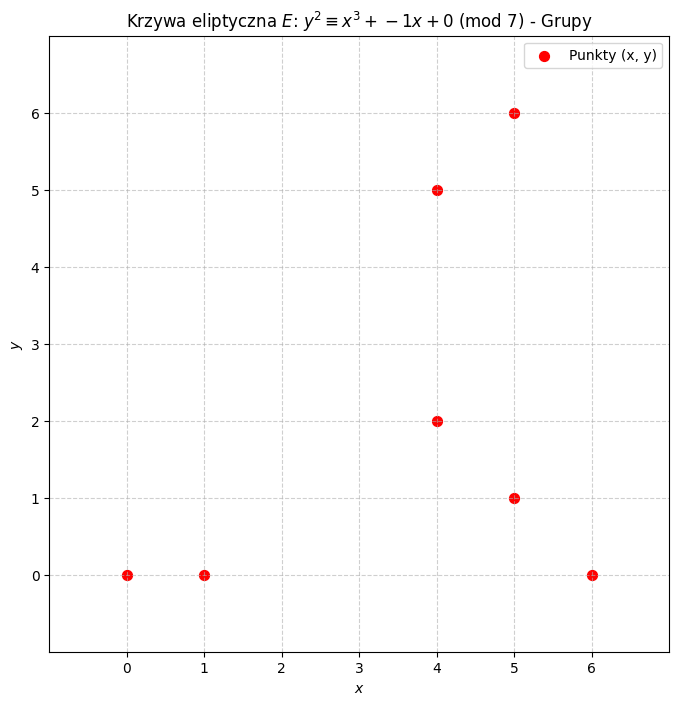

In [10]:
a1, b1, p1 = -1, 0, 7
points1 = gen(a1, b1, p1)
print(f"Punkty krzywej E1 (bez O): {points1}")
plot_elliptic_curve_zp(a1, b1, p1, points1, title_suffix=" - Grupy")
# Otrzymane punkty: [[0, 0], [1, 0], [4, 2], [4, 5], [5, 1], [5, 6], [6, 0]]
# Liczba punktów #E = 7 + 1 (O) = 8 6],

Grupa - zbiór elementów wraz z jedną operacją, która spełnia:
1. Zamkniętość: Wynik operacji na dwóch elementach jest zawsze elementem tej grupy
2. Łączność: (P+Q)+R = P+(Q+R)
3. Element Neutralny: Istnieje element O taki, że P + O = P
4. Element Odwrotny: Dla każdego Punktu P istnieje punkt -P taki że P + (-P) = O

Rząd Punktu P to najmniejsza dodatnia liczba całkowita n, dla której zachodzi n * P = O
1. Jeśli ord(P) = k, oznacza to, że po dodaniu punktu P do siebie k razy, otrzymujemy element neutralny grupy
2. Wszystkie punkty P, 2P, 3P, ..., (k-1)P, kP=O twprzą grupę cykliczną generowaną przez punkt P, i liczba elementów w tej grupie wynosi k

In [11]:
print(points1[0])
print(multiply(2, points1[0], a1, p1))

[0, 0]
[nan, nan]


Punkt $P_0$ generuje dwuelementową grupę:

{$P_0,\mathcal{O}$},

bo $2P_0=\mathcal{O}$.

In [12]:
print(points1[1])
print(multiply(2, points1[1], a1, p1))

[1, 0]
[nan, nan]


Punkt $P_1$ generuje dwuelementową grupę:

{$P_1,\mathcal{O}$},

bo $2P_1=\mathcal{O}$.

In [13]:
print(points1[2])
print(multiply(2, points1[2], a1, p1))
print(multiply(3, points1[2], a1, p1))
print(multiply(4, points1[2], a1, p1))

[4, 2]
[1, 0]
[4, 5]
[nan, nan]


Punkt $P_2$ generuje czteroelementową grupę:

{$P_2,P_1,P_3\mathcal{O}$},

bo $2P_2=P_1$, $3P_2=P_3$ i $4P_2=\mathcal{O}$.

In [14]:
print(points1[3])
print(multiply(2, points1[3], a1, p1))
print(multiply(3, points1[3], a1, p1))
print(multiply(4, points1[3], a1, p1))

[4, 5]
[1, 0]
[4, 2]
[nan, nan]


Punkt $P_3$ generuje czteroelementową grupę, tę samą co $P_2$:

{$P_3,P_1,P_2\mathcal{O}$},

bo $2P_3=P_1$, $3P_3=P_2$ i $4P_3=\mathcal{O}$.

In [15]:
print(points1[4])
print(multiply(2, points1[4], a1, p1))
print(multiply(3, points1[4], a1, p1))
print(multiply(4, points1[4], a1, p1))

[5, 1]
[1, 0]
[5, 6]
[nan, nan]


Punkt $P_4$ generuje czteroelementową grupę:

{$P_4,P_1,P_5\mathcal{O}$},

bo $2P_4=P_1$, $3P_4=P_5$ i $4P_4=\mathcal{O}$.

In [16]:
print(points1[5])
print(multiply(2, points1[5], a1, p1))
print(multiply(3, points1[5], a1, p1))
print(multiply(4, points1[5], a1, p1))

[5, 6]
[1, 0]
[5, 1]
[nan, nan]


Punkt $P_5$ generuje czteroelementową grupę, tę samą co punkt $P_4$:

{$P_5,P_1,P_4\mathcal{O}$},

bo $2P_5=P_1$, $3P_5=P_4$ i $4P_5=\mathcal{O}$.

In [17]:
print(points1[6])
print(multiply(2, points1[6], a1, p1))

[6, 0]
[nan, nan]


Punkt $P_6$ generuje dwuelementową grupę:

{$P_6, \mathcal{O}$},

bo $2P_6=\mathcal{O}$.

Punkty krzywej E2 (bez O): [[0, 0], [1, 0], [2, 1], [2, 4], [3, 2], [3, 3], [4, 0]]


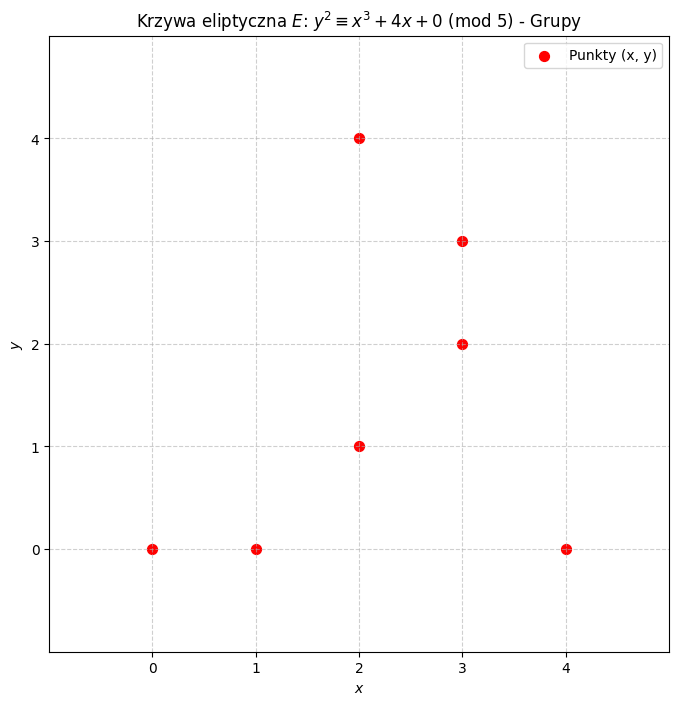

In [18]:
a2, b2, p2 = 4, 0, 5
points2 = gen(a2, b2, p2)
print(f"Punkty krzywej E2 (bez O): {points2}")
plot_elliptic_curve_zp(a2, b2, p2, points2, title_suffix=" - Grupy")


In [19]:
def find_point_index(point, P_list):
    if np.all(np.isnan(point)):
        return "O"

    point_int = [int(point[0]), int(point[1])]

    try:
        index = P_list.index(point_int)
        return f"P{index}"
    except ValueError:
        return str(point_int)

In [20]:
print("Grupa Generowana przez punkt P0")
print(points2[0], find_point_index(points2[0], points2))
print(multiply(2, points2[0], a2, p2), find_point_index(multiply(2, points2[0], a2, p2), points2))
print("------------------------------------------------------------------------------------------")
print("Grupa Generowana przez punkt P1")
print(points2[1], find_point_index(points2[1], points2))
print(multiply(2, points2[1], a2, p2), find_point_index(multiply(2, points2[1], a2, p2), points2))
print("------------------------------------------------------------------------------------------")
print("Grupa Generowana przez punkt P2")
print(points2[2], find_point_index(points2[2], points2))
print(multiply(2, points2[2], a2, p2), find_point_index(multiply(2, points2[2], a2, p2), points2))
print(multiply(3, points2[2], a2, p2), find_point_index(multiply(3, points2[2], a2, p2), points2))
print(multiply(4, points2[2], a2, p2), find_point_index(multiply(4, points2[2], a2, p2), points2))
print("------------------------------------------------------------------------------------------")
print("Grupa Generowana przez punkt P3")
print(points2[3], find_point_index(points2[3], points2))
print(multiply(2, points2[3], a2, p2), find_point_index(multiply(2, points2[3], a2, p2), points2))
print(multiply(3, points2[3], a2, p2), find_point_index(multiply(3, points2[3], a2, p2), points2))
print(multiply(4, points2[3], a2, p2), find_point_index(multiply(4, points2[3], a2, p2), points2))
print("------------------------------------------------------------------------------------------")
print("Grupa Generowana przez punkt P4")
print(points2[4], find_point_index(points2[4], points2))
print(multiply(2, points2[4], a2, p2), find_point_index(multiply(2, points2[4], a2, p2), points2))
print(multiply(3, points2[4], a2, p2), find_point_index(multiply(3, points2[4], a2, p2), points2))
print(multiply(4, points2[4], a2, p2), find_point_index(multiply(4, points2[4], a2, p2), points2))
print("------------------------------------------------------------------------------------------")
print("Grupa Generowana przez punkt P5")
print(points2[5], find_point_index(points2[5], points2))
print(multiply(2, points2[5], a2, p2), find_point_index(multiply(2, points2[5], a2, p2), points2))
print(multiply(3, points2[5], a2, p2), find_point_index(multiply(3, points2[5], a2, p2), points2))
print(multiply(4, points2[5], a2, p2), find_point_index(multiply(4, points2[5], a2, p2), points2))
print("------------------------------------------------------------------------------------------")
print("Grupa Generowana przez punkt P6")
print(points2[6], find_point_index(points2[6], points2))
print(multiply(2, points2[6], a2, p2), find_point_index(multiply(2, points2[6], a2, p2), points2))


Grupa Generowana przez punkt P0
[0, 0] P0
[nan, nan] O
------------------------------------------------------------------------------------------
Grupa Generowana przez punkt P1
[1, 0] P1
[nan, nan] O
------------------------------------------------------------------------------------------
Grupa Generowana przez punkt P2
[2, 1] P2
[0, 0] P0
[2, 4] P3
[nan, nan] O
------------------------------------------------------------------------------------------
Grupa Generowana przez punkt P3
[2, 4] P3
[0, 0] P0
[2, 1] P2
[nan, nan] O
------------------------------------------------------------------------------------------
Grupa Generowana przez punkt P4
[3, 2] P4
[0, 0] P0
[3, 3] P5
[nan, nan] O
------------------------------------------------------------------------------------------
Grupa Generowana przez punkt P5
[3, 3] P5
[0, 0] P0
[3, 2] P4
[nan, nan] O
------------------------------------------------------------------------------------------
Grupa Generowana przez punkt P6
[4, 0] P6
[n

## Zadanie 4 (1 pkt)

Sprawdź numerycznie, korzystając z funkcji **gen()**, twierdzenie Hassego. Sprawdź, że ze wzrostem liczby pierwszej $p$ dla krzywej o parametrach $a=-1$, $b=0$ liczba punktów na krzywej podąża za oszacowaniem $p+1-2\sqrt{p}\leq\#E\leq p+1+2\sqrt{p}$. Narysuj wykres $\#E(p)$ i proste o równaniach $p+1-2\sqrt{p}$ oraz $p+1+2\sqrt{p}$.

Uwaga: Możesz wygenerować liczby pierwsze, np. w zakresie od 0 do 1000, za pomocą:

Weryfikacja numeryczna Twierdzenia Hassego pomyślna!
Wszystkie 167 punkty #E(p) mieszczą się w zakresie p+1 +/- 2√p.


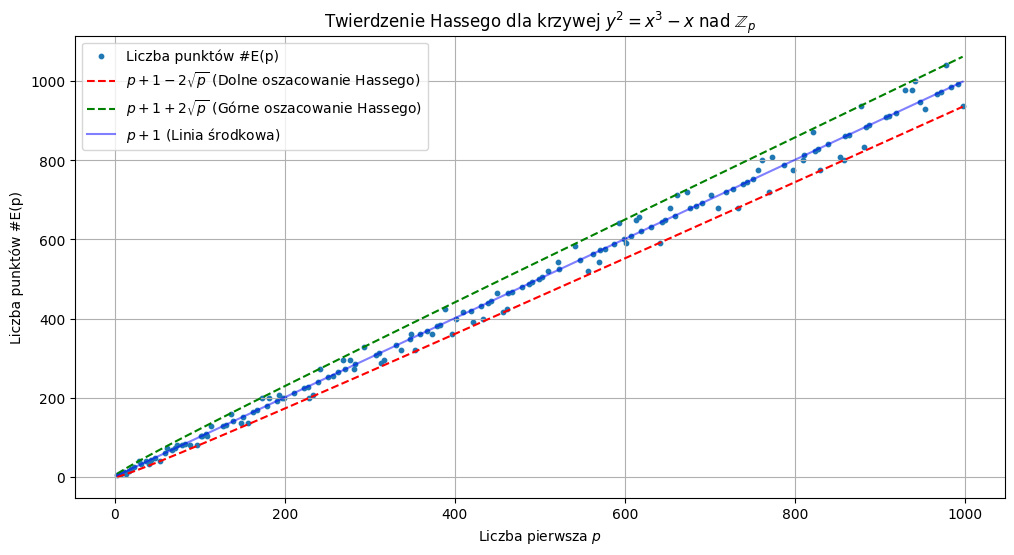

In [21]:
from sympy import primerange


primes = list(primerange(0, 1000))

a, b = -1, 0
n_points = []

for p in primes:
    if p > 2:
        E_p_size = len(gen(a, b, p)) + 1
        n_points.append(E_p_size)

primes_arr = np.array([p for p in primes if p > 2])
n_points_arr = np.array(n_points)

lower_bound = primes_arr + 1 - 2 * np.sqrt(primes_arr)
upper_bound = primes_arr + 1 + 2 * np.sqrt(primes_arr)

is_lower_bound_ok = n_points_arr >= lower_bound
is_upper_bound_ok = n_points_arr <= upper_bound

all_bounds_ok = is_lower_bound_ok & is_upper_bound_ok

if np.all(all_bounds_ok):
    print("Weryfikacja numeryczna Twierdzenia Hassego pomyślna!")
    print(f"Wszystkie {len(n_points_arr)} punkty #E(p) mieszczą się w zakresie p+1 +/- 2√p.")
else:
    print("Weryfikacja numeryczna Twierdzenia Hassego NIEZGODNA!")


plt.figure(figsize=(12, 6))
plt.scatter(primes_arr, n_points_arr, label='Liczba punktów #E(p)', s=10)

plt.plot(primes_arr, lower_bound, 'r--', label=r'$p+1-2\sqrt{p}$ (Dolne oszacowanie Hassego)')
plt.plot(primes_arr, upper_bound, 'g--', label=r'$p+1+2\sqrt{p}$ (Górne oszacowanie Hassego)')
plt.plot(primes_arr, primes_arr + 1, 'b-', alpha=0.5, label=r'$p+1$ (Linia środkowa)')

plt.title(r'Twierdzenie Hassego dla krzywej $y^2 = x^3 - x$ nad $\mathbb{Z}_p$')
plt.xlabel(r'Liczba pierwsza $p$')
plt.ylabel('Liczba punktów #E(p)')

plt.legend()
plt.grid(True)
plt.show()

lub jakkolwiek inaczej.

## Zadanie 5 (2 pkt.)

Napisz funkcję **ord(G,a,p)** znajdującą rząd punktu $G$ na krzywej o parametrach $a$, $p$ (oznaczenia jak w poprzednich zadaniach). Rząd elementu to $n$ takie, że $nG=\mathcal{O}$. Znajdź punkt na krzywej o parametrach $a=-1$,$b=0$,$p=97$ o największym rzędzie, moze ich być więcej niż jeden, wybierz którykolwiek.

In [22]:
def ord_func(G, a, p):
    if np.all(np.isnan(G)):
        return 1

    E_size = len(gen(a, 0, p)) + 1

    for n in range(1, E_size + 1):
        nP = multiply(n, G, a, p)
        if np.all(np.isnan(nP)):
            return n

    return None

In [23]:
print(ord_func([4,4],-1,11)==3)
print(ord_func([8,8],-1,11)==6)
print(ord_func([3,2],-1,7)==3)
print(ord_func([3,5],-1,7)==3)
print(ord_func([3,2],0,5)==3)
print(ord_func([0,0],0,5)==2)

True
True
True
True
True
True


In [24]:
def find_max_order_point(a, b, p):
    finite_points = gen(a, b, p)

    max_order = 1
    best_point = [float('nan'), float('nan')]

    for P_coords in finite_points:
        P = P_coords
        current_order = ord_func(P, a, p)

        if current_order is not None and current_order > max_order:
            max_order = current_order
            best_point = P

    return best_point, max_order

In [25]:
a, b, p = -1, 0, 97

max_point, max_ord = find_max_order_point(a, b, p)

E_size = len(gen(a, b, p)) + 1

print(f"--- Parametry krzywej ---\nKrzywa: y^2 = x^3 {a}x {b} mod {p}")
print(f"Rząd grupy #E(p): {E_size}")

print(f"Największy znaleziony rząd: {max_ord}")
print(f"Punkt o największym rzędzie: {max_point}")

--- Parametry krzywej ---
Krzywa: y^2 = x^3 -1x 0 mod 97
Rząd grupy #E(p): 80
Największy znaleziony rząd: 20
Punkt o największym rzędzie: [6, 4]


## Zadanie 6 (1 pkt)

Prześledź działanie protokołu Diffiego-Helmana, jednak tym razem opertego o krzywe eliptyczne, i uzupełnij poszczególne kroki.

Alicja i Bob ustalają publicznie krzywą eliptyczą (czyli parametry $a$, $b$, $p$) w której będą działać oraz punkt na tej krzywej $G$. Weź krzywą z poprzedniego zadania oraz znaleziony w nim punkt.

In [26]:
a = -1
b = 0
G = [6, 4]
p = 97

Alicja wybiera losową liczbę naturalną $n$ z przedziału $[2,\#E-1]$, $\#E$ to liczba punktów na krzywej:

In [27]:
n = random.randint(2, 79)
print(n)

26


Następnie oblicza $A=nG$ zgodnie z zasadami mnożenia punktów na krzywej przez liczbe naturalną:

In [28]:
A=multiply(n, G, a, p)
print(A)

[65, 70]


To samo robi Bob, wybiera losową liczbę naturalną $m$ i oblicza $B=mG$:

In [29]:
m=random.randint(2, 79)
print(m)
B=multiply(m, G, a, p)
print(B)

54
[65, 27]


Liczby $n$ i $m$ są znane tylko, odpowiednio, Alicji i Bobowi, natomiast $A$ oraz $B$ są wymieniane publicznym kanałem. Bob otrzymuje $A$ i wykonuje operację $k_B=mA$, z kolei Alicja otrzymuje $B$ i wykonuje operację $k_A=nB$:

In [30]:
k_B=multiply(m, A, a, p)
print(k_B)
k_A=multiply(n, B, a, p)
print(k_A)

[94, 49]
[94, 49]


In [31]:
k_A==k_B

True

Zawuażmy, że $k_A=k_B$, wynika to z tego, że $k_A=nB=nmG$ oraz $k_B=mA=mnG$ a oczywiście $nm=mn$. Zatem Alicja i Bob dysponują tą samą liczbą, którą mogą użyć jako klucz do szyfrowania. Publicznie znane są wartości $a$, $b$, $p$, $G$, $nG$ oraz $mG$, jednak odzyskanie z nich $n$ i $m$ jest bardzo trudne przy odpwiednim doborze krzywej i punktu na niej.